### <div style="text-align: left; background-color: #003554; color: white; padding: 10px; line-height: 1">PS3-1 A Simple Neural Network</div>

#### a)
Let $l^{(i)} = (o^{(i)} - y^{(i)})^2$. Then

$$
\frac{\partial l}{\partial w^{[1]}_{1, 2}} = \frac{1}{m}\Sigma_{i=1}^m\frac{\partial l^{(i)}}{\partial w^{[1]}_{1, 2}}
$$

Note that $w^{[1]}_{1, 2}$ is only affecting $h_2^{(i)}$. And thus
$$
\frac{\partial l^{(i)}}{\partial w^{[1]}_{1,2}} = \frac{\partial l^{(i)}}{\partial o^{(i)}}\frac{\partial o^{(i)}}{\partial h_2^{(i)}}\frac{\partial h_2^{(i)}}{\partial w^{[1]}_{1, 2}}
$$

$$
\frac{\partial l^{(i)}}{\partial w^{[1]}_{1,2}} = \frac{\partial l^{(i)}}{\partial o^{(i)}}\frac{\partial o^{(i)}}{\partial h_2^{(i)}}\frac{\partial h_2^{(i)}}{\partial w^{[1]}_{1, 2}}
$$

Since $l^{(i)} = (o^{(i)} - y^{(i)})^2$,

$$
\frac{\partial l^{(i)}}{\partial o^{(i)}} = 2(o^{(i)} - y^{(i)})
$$

Since $o^{(i)} = \sigma(w^{[2]}_0 + w^{[2]}_1 h_1^{(i)} + w_2^{[2]}h_2^{(i)} + w_3^{[3]}h_3^{(i)})$ ,

$$
\frac{\partial o^{(i)}}{\partial h_2^{(i)}} = o^{(i)}(1 - o^{(i)})w_2^{[2]}
$$
And since $h_2^{(i)} = \sigma(w^{[1]}_{0, 2}  + w^{[1]}_{1, 2}x^{(i)}_1+ w^{[1]}_{2, 2}x^{(i)}_2)$,

$$
\frac{\partial h_2^{(i)}}{\partial w^{[1]}_{1, 2}} = h_2^{(i)}(1- h_2^{(i)}) x_1^{(i)}
$$

Combining them we get

$$
\frac{\partial l}{\partial w^{[1]}_{1, 2}} = \sum_{i=1}^m 2(o^{(i)} - y^{(i)})o^{(i)}(1 -  o^{(i)}) \sigma(w^{[1]}_{0, 2}  + w^{[1]}_{1, 2}x^{(i)}_1+ w^{[1]}_{2, 2}x^{(i)}_2)(1 - \sigma(w^{[1]}_{0, 2}  + w^{[1]}_{1, 2}x^{(i)}_1+ w^{[1]}_{2, 2}x^{(i)}_2)w_2^{[2]}x_1^{(i)}
$$

#### b)
It is possible. Three lines can be used to determine the decision boundary. The three lines are
$$
\begin{aligned}
        x_1 = 0.5\\
        x_2 = 0.5\\
        x_1 + x_2 = 4
\end{aligned}
$$

If we make 
$$
    \begin{aligned}
        h_1 = 1 \Leftrightarrow x_1 \le 0.5\\
        h_2 = 1 \Leftrightarrow x_2 \le 0.5\\
        h_3 = 1 \Leftrightarrow x_1 + x_2 \ge 4
    \end{aligned}
$$

And

$$
o = 1 \Leftrightarrow h_1 + h_2 + h_3 \ge 1
$$

Then $o = 1$ if and only if the points are not in the triangle region. The weights can then be determined using these equations.

#### c)
This is impossible. Note in this case
$$
    \begin{aligned}
        &h = (w^{[1]})^T x\\
        &o = \text{step}((w^{[2]})^T h) = \text{step}((w^{[2]}w^{[1]})^T x)
    \end{aligned}
$$

And clearly the decision boundary will be a single line, which cannot separate the two classes.

### <div style="text-align: left; background-color: #003554; color: white; padding: 10px; line-height: 1">PS3-2 KL Divergence and Maximum Likelihood</div>

#### 2)
#### a) Nonnegativity
The goal is to prove that $K L(P \| Q) \geq 0$.
$$
\begin{aligned}
D_{K L}(P \| Q) &=\sum_{x} P(x) \log \frac{P(x)}{Q(x)} \\
&=-\sum_{x} P(x) \log \frac{Q(x)}{P(x)} \\
& \geq-\log \sum_{x} P(x) \frac{Q(x)}{P(x)} \\
& \geq-\log \sum_{x} Q(x) \\
& \geq-\log 1 \\
& \geq 0
\end{aligned}
$$

#### b) Chain Rule for KL Divergence
The inequality becomes equality only when $Q(x) / P(x) = c$ is a constant. And this implies that $Q(x) = P(x)$.

We have
$$
\begin{aligned}
        D_{KL}(P(X, Y)\|Q(X, Y)) &= \sum_{y, x} P(x, y)\log\frac{P(x, y)}{Q(x, y)}\\
        &= \sum_{x, y} P(x, y) \log \frac{P(y|x)P(x)}{Q(y|x)Q(x)} \\
        & = \sum_{x,y}P(x, y)\log\frac{P(x)}{Q(x)} + \sum_{x, y}P(y|x)P(x)\log\frac{P(y|x)}{Q(y|x)}\\
        &= \sum_{x}P(x)\log\frac{P(x)}{Q(x)} + \sum_{x}P(x)\sum_{y}P(y|x)\log\frac{P(y|x)}{Q(y|x)}\\
        &= D_{KL}(P(X)\|Q(X)) + D_{KL}(P(Y|X)\|Q(Y|X))
\end{aligned}
$$

#### c) KL and maximum likelihood
Note that
$$
\begin{aligned}
        D_{KL}(\hat P\|P_\theta) &=  \sum_{x\in\cal X} \hat P(x)\log \frac{\hat P(x)}{P_\theta(x)}\\
        &= \sum_{x\in\cal X}\hat P(x)\log\hat P(x) - \sum_{x\in\cal X}\hat P(x)\log P_\theta(x)\\
        &= c - \sum_{i=1}^m \log P_\theta(x)
\end{aligned}
$$

And minimizing this is just maximizing the log likelihood. 

### <div style="text-align: left; background-color: #003554; color: white; padding: 10px; line-height: 1">PS3-3 KL Divergence, Fisher Information, and the Natural Gradient </div>

#### a) Score function
Note

$$
\begin{aligned}
        E_{y\sim p(y;\theta)}[\nabla_{\theta'}\log p(y;\theta')|_{\theta' = \theta}] &= \int_{-\infty}^{\infty}(\nabla_{\theta'}\log p(y;\theta')|_{\theta' = \theta}) p(y;\theta)dy \\
        &= \int_{-\infty}^{\infty}p(y;\theta)\frac{1}{p(y;\theta)} \nabla_\theta p(y;\theta)dy\\
        &= \nabla_\theta \int_{-\infty}^{\infty}p(y;\theta)dy = 0
\end{aligned}
$$

#### b) Fisher Information
This is trivial from the definition the a covariance matrix for a random variable $X$:

$$
Cov(X) = E[(X - E[X])(X - E[X])^T]
$$

In this case, $E(X) = 0$ for $X = \nabla_{\theta'}\log p(y;\theta') |_{\theta'=\theta}$. And thus

$$
\begin{aligned}
        \mathcal I(\theta) &= Cov_{y\sim p(y;\theta)}[\nabla_{\theta'}\log p(y;\theta')|_{\theta' = \theta}] \\
        &= E_{y\sim p(y;\theta)}[(\nabla_{\theta'}\log p(y;\theta')|_{\theta' = \theta} - 0)(\nabla_{\theta'}\log p(y;\theta')|_{\theta' = \theta} - 0)^T]\\
        &= E_{y\sim p(y;\theta)}[\nabla_{\theta'}\log p(y;\theta')\nabla_{\theta'}\log p(y;\theta')^T|_{\theta' = \theta}]\\
\end{aligned}
$$

#### c) Fisher Information (Alternate form)

$$
\begin{aligned}
&E_{y\sim p(y;\theta)}[ - \nabla^2_{\theta'}\log p(y;\theta')|_{\theta' = \theta}]\\
&=E_{y\sim p(y;\theta)}[-\nabla_{\theta'}(\frac{1}{p(y;\theta') }\nabla_{\theta' }p(y;\theta'))|_{\theta' = \theta}]\\
&= E_{y\sim p(y;\theta)}[\frac{\nabla_{\theta'}p(y;\theta')\nabla_{\theta'}p(y;\theta')}{p(y;\theta')^2} - \frac{1}{p(y;\theta')}\nabla_{\theta'}^2 p(y;\theta')]\\
&= E_{y\sim p(y;\theta)}[\nabla_{\theta'}\log p(y;\theta')\nabla_{\theta'}\log p(y;\theta')|_{\theta' = \theta}] + \int_{-\infty}^{\infty}\nabla_{\theta}^2 p(y;\theta) dy\\
&= E_{y\sim p(y;\theta)}[\nabla_{\theta'}\log p(y;\theta')\nabla_{\theta'}\log p(y;\theta')|_{\theta' = \theta}] = \cal I(\theta)
\end{aligned}
$$

#### c) Approximating $D_{KL}$ with Fisher Information
We have

$$
\begin{aligned}
D_{KL }(p_\theta\|p_{\tilde \theta})&\approx D_{KL}(p_\theta\| p_{\theta}) + (\tilde \theta - \theta)^T\nabla_{\theta'}\log p(y;\theta')|_{\theta' = \theta} + \frac{1}{2}(\tilde \theta - \theta)^T\nabla_{\theta'}^2\log p(y;\theta')|_{\theta' = \theta}
(\tilde \theta - \theta)\\
&= 0 + (\tilde \theta - \theta)^T E_{y\sim p(y;\theta)}[-\nabla_{\theta'}\log p(y;\theta')|_{\theta' = \theta}] + \frac{1}{2}(\tilde \theta - \theta)^T E_{y\sim p(y;\theta)}[-\nabla_{\theta'}^2\log p(y;\theta')|_{\theta' = \theta}](\tilde \theta - \theta)\\
&= \frac{1}{2}d^T\mathcal I(\theta) d
\end{aligned}
$$

#### e) Natural Gradient
Since

$$
l(\theta+ d) \approx \log p(y;\theta) + d^T\nabla_{\theta'}\log p(y;\theta')|_{\theta' =\theta}
$$

We can construct the Lagrangian for this optimization problem as

$$
\begin{aligned}
\mathcal L(d, \lambda) &= l(\theta+d)  - \lambda[D_{KL}(p_{\theta}\|p_{\theta' + d}) - c]\\
&= \log p(y;\theta) + d^T\nabla_{\theta'}\log p(y;\theta')|_{\theta' = \theta} - \lambda[\frac{1}{2}d^T\mathcal I(\theta)d - c]
\end{aligned}
$$

The sufficient condition for maximization is
$$
\begin{aligned}
\frac{\partial \cal L}{\partial d} &=  \nabla_{\theta'}\log p(y;\theta')|_{\theta' = \theta} - \lambda \mathcal I(\theta)d\\
\frac{\partial \cal L}{\partial \lambda} &= \frac{1}{2}d^T\mathcal I(\theta) d - c
\end{aligned}
$$

Setting the first to be zero, we get

$$
d = \frac{1}{\lambda}\mathcal I(\theta)^{-1}\nabla_{\theta'}\log p(y;\theta')|_{\theta' = \theta}
$$

So our unscaled natural gradient is then

$$
\tilde d = \mathcal I(\theta)^{-1} \nabla_{\theta'}\log p(y;\theta')|_{\theta'  = \theta}
$$

Now, plug $d$ into the second formula and set it to zero, we get

$$
\frac{1}{2}(\frac{1}{\lambda}\mathcal I(\theta)^{-1}\nabla_{\theta'}\log p(y;\theta')|_{\theta' = \theta})^T\mathcal I(\theta) (\frac{1}{\lambda}\mathcal I(\theta)^{-1}\nabla_{\theta'}\log p(y;\theta')|_{\theta' = \theta}) = c
$$

or

$$
\lambda = \sqrt{\frac{1}{2c}(\nabla_{\theta'}\log p(y;\theta')|_{\theta' = \theta})^T\mathcal I(\theta)^{-1} (\nabla_{\theta'}\log p(y;\theta')|_{\theta' = \theta})}
$$

Thus, the final $d^*$ is given by

$$
d^{*} =\sqrt{\frac{2c}{(\nabla_{\theta'}\log p(y;\theta')|_{\theta' = \theta})^T\mathcal I(\theta)^{-1} (\nabla_{\theta'}\log p(y;\theta')|_{\theta' = \theta})}}\mathcal I(\theta)^{-1}\nabla_{\theta'}\log p(y;\theta')|_{\theta' = \theta}
$$

I think this is not generally true if you define $l(x, y, \theta) = p(x, y;\theta)$ and consider multiple $x^{(i)}, y^{(i)}$'s. However, if $x$ is fixed, and you are trying to maximize the conditional likelihood $l(y, \theta) = p(y|x; \theta)$ this is true. For convenience we consider a single example $y$.

#### f) Relation to Newton's Method
The natural gradient update rule is given by

$$
\theta := \theta+ \alpha \mathcal {I(\theta)}^{-1} \nabla_{\theta}l(y, \theta)
$$

And Newton's rule gives
$$
\theta := \theta - H^{-1}\nabla_{\theta}l(y;\theta)
$$

Note that

$$
\mathcal I(\theta)^{-1} = E_{y\sim p(y|x;\theta)}[-\nabla_{\theta}^2 l(y;\theta)] =  E_{y\sim p(y|x;\theta}[-H^{-1}]
$$

As we see in problem set 1, in generalized linear model, $H$ is only dependent on $x$ but not $y$. So $\mathcal I(\theta) = - H^{-1}$, which proves the results.

### <div style="text-align: left; background-color: #003554; color: white; padding: 10px; line-height: 1">PS3-4 Semi-supervised EM</div>
#### a) Convergence
This is trivial from

$$
\begin{aligned}
l_{semi-sup}(\theta^{(t)}) &= \sum_{i=1}^m  \sum_{z^{(i)}}Q_{i}(z^{(i)})\log\frac{p(x^{(i)}, z^{(i)}; \theta^{(t)})}{Q_i(z^{(i)})} +\alpha l_{sup}(\theta^{(t)})\\
&\le  \sum_{i=1}^m  \sum_{z^{(i)}}Q_{i}(z^{(i)})\log\frac{p(x^{(i)}, z^{(i)}; \theta^{(t + 1)})}{Q_i(z^{(i)})}+ \alpha l_{sup}(\theta^{(t + 1)})\\
&\le l_{unsup}(\theta^{(t + 1)}) + \alpha l_{sup}(\theta^{(t + 1)})
= l_{semi-sup}(\theta^{t+1})
\end{aligned}
$$

#### b) Semi-supervised E-Step
The first line and third line come from Jensen's inequality, and the second line comes from maximization.

In the E-step, we need to re-estimate $z^{(i)}$ for $i = 1, \ldots, m$. Specifically, we set

$$
\begin{aligned}
w^{(i)}_j &= Q_i(z^{(i)} = j)\\
&= p(z^{(i)} = j|x^{(i)}; \phi, \mu, \Sigma)\\
&= \frac{p(x^{(i)}|z^{(i)} = j)p(z^{(i)} =j)}{\sum_{l=1}^k p(x^{(i)}|z^{(i)} = l)p(z^{(i)} = l)}\\
&= \frac{\frac{1}{(2\pi)^{n/2}|\Sigma_j|^{1/2}}\exp(-\frac{1}{2}(x^{(i)} - \mu_j)^T\Sigma_j^{-1}(x^{(i)} - \mu_j))\phi_j}{\sum_{l=1}^k\frac{1}{(2\pi)^{n/2}|\Sigma_l|^{1/2}}\exp(-\frac{1}{2}(x^{(i)} - \mu_l)^T\Sigma_l^{-1}(x^{(i)} - \mu_l))\phi_l}
\end{aligned}
$$

#### c) Semi-supervised M-Step
For convenience we define

$$
\tilde w^{(i)}_j = 1\{\tilde z^{(i)} = j\}
$$

From the lecture note, we should easily derive the derivative from

$\mu_j$ as
$$
\begin{aligned}
\nabla_{\mu_j}l &= \sum_{i=1}^m w^{(i)}_j \Sigma_j^{-1}(x^{(i)} - \mu_j) + \alpha \sum_{i=1}^{\tilde m}\tilde w^{(i)}_j \Sigma_j^{-1}(\tilde x^{(i)} - \mu_j)
\end{aligned}
$$

Setting this to zero, we get

$$
\mu_j = \frac{\sum_{i=1}^m w^{(i)}_j x^{(i)}+ \alpha \sum_{i=1}^{\tilde m}\tilde w^{(i)}_j\tilde x^{(i)}}{\sum_{i=1}^m w^{(i)}_j + \alpha \sum_{i=1}^{\tilde m}\tilde w^{(i)}_j}
$$

Similarly,

$$
\Sigma_j = \frac{\sum_{i=1}^m w^{(i)}_j (x^{(i)} - \mu_j)(x^{(i)} - \mu_j)^T+ \alpha \sum_{i=1}^{\tilde m}\tilde w^{(i)}_j (\tilde x^{(i)} - \mu_j)(\tilde x^{(i)} - \mu_j)^T}{\sum_{i=1}^m w^{(i)}_j + \alpha \sum_{i=1}^{\tilde m}\tilde w^{(i)}_j}
$$

For $\phi$, we need to maximize

$$
\sum_{i=1}^m\sum_{j=1}^kw^{(i)}_j \log \phi_j + \alpha\sum_{i=1}^{\tilde m}\sum_{j=1}^k\tilde w^{(i)}_j \log \phi_j
$$

subjective to

$$
\sum_{j=1}^k \phi_j = 1
$$

We construct the Lagrangian

$$
    \mathcal L(\phi, \beta) =\sum_{i=1}^m\sum_{j=1}^kw^{(i)}_j \log \phi_j + \alpha\sum_{i=1}^{\tilde m}\sum_{j=1}^k\tilde w^{(i)}_j \log \phi_j + \beta(1 - \sum_{j=1}^k \phi_j)
$$

And derivetive for

$$
    \frac{\partial\mathcal L}{\partial \phi_j} = \sum_{i=1}^m\frac{w^{(i)}_j}{\phi_j} + \alpha \sum_{i=1}^{\tilde m}\frac{\tilde w^{(i)}_j}{\phi_j} - \beta
$$

Set it to zero we get

$$
    \phi_j = \frac{\sum_{i=1}^mw^{(i)}_j + \alpha \sum_{i=1}^{\tilde m}{\tilde w}^{(i)}_j}{\beta}
$$

Considering the constraint $\sum_{j=1}^k \phi_j = 1$, we get $\beta = m + \alpha \tilde m$. So

$$
    \phi_j = \frac{\sum_{i=1}^mw^{(i)}_j + \alpha \sum_{i=1}^{\tilde m}\tilde w^{(i)}_j}{m + \alpha \tilde m}
$$

In [15]:
import matplotlib.pyplot as plt
import numpy as np
import os

PLOT_COLORS = ['red', 'black', 'blue', 'orange']  # Colors for your plots
K = 4           # Number of Gaussians in the mixture model
NUM_TRIALS = 3  # Number of trials to run (can be adjusted for debugging)
UNLABELED = -1  # Cluster label for unlabeled data points (do not change)

In [16]:
def main(is_semi_supervised, trial_num):
    """Problem 3: EM for Gaussian Mixture Models (unsupervised and semi-supervised)"""
    print('Running {} EM algorithm...'
          .format('semi-supervised' if is_semi_supervised else 'unsupervised'))

    # Load dataset
    train_path = os.path.join('data','ds3_train.csv')
    x, z = load_gmm_dataset(train_path)
    x_tilde = None

    if is_semi_supervised:
        # Split into labeled and unlabeled examples
        labeled_idxs = (z != UNLABELED).squeeze()
        x_tilde = x[labeled_idxs, :]   # Labeled examples
        z = z[labeled_idxs, :]         # Corresponding labels
        x = x[~labeled_idxs, :]        # Unlabeled examples

    # *** START CODE HERE ***
    m,n = x.shape
    # (1) Initialize mu and sigma by splitting the m data points uniformly at random
    # into K groups, then calculating the sample mean and covariance for each group
    classes = np.random.randint(K, size=m)
    
    # shape (k,n)
    mu = np.array([x[classes == j].mean(axis=0) for j in range(K)])
    #print(mu.shape, "mu shape", "want:", (K,n))
    sigma = []
    for j in range(K):
        class_size = (classes == j).sum()
        
        # shape (class_size,n)
        xj_normed = x[classes ==j]-mu[j] 
        
        # shape (n,n)
        sigma.append(xj_normed.T @ xj_normed /class_size)
        

    
    # (2) Initialize phi to place equal probability on each Gaussian
    # phi should be a numpy array of shape (K,)
    phi = np.ones((K,))/K
    # (3) Initialize the w values to place equal probability on each Gaussian
    # w should be a numpy array of shape (m, K)
    w = np.ones((m, K))/K
    # *** END CODE HERE ***

    if is_semi_supervised:
        w = run_semi_supervised_em(x, x_tilde, z, w, phi, mu, sigma)
    else:
        w = run_em(x, w, phi, mu, sigma)

    # Plot your predictions
    z_pred = np.zeros(m)
    if w is not None:  # Just a placeholder for the starter code
        for i in range(m):
            z_pred[i] = np.argmax(w[i])

    plot_gmm_preds(x, z_pred, is_semi_supervised, plot_id=trial_num)

In [17]:
def joint_pdf(x, phi, mu, sigma, with_supervision=False, x_tilde=None, z=None):
    """
    Args:
        x: Design matrix of shape (m, n).
        phi: mixture prior, of shape (k,).
        mu: cluster means, list of k arrays of shape (n,).
        sigma: cluster covariances, list of k arrays of shape (n, n).
        
        optional for semi-supervised case:
        with_supervision: boolean
        x_tilde: Design matrix of shape (m_tilde, n)
        z: observed values, shape (m_tilde,1)

    Returns: 
        in unsupervised case:
        joint pdf p(x,z; phi, mu, sigma), array of shape (m,k)
        
        in semisupervised case also returns
        joint pdf p(x_tilde, z; phi, mu, sigma), array of shape (m_tilde,)
    """
    m,n = x.shape
    k,= phi.shape
    
    # compute determinants and inverses of the covariance matrices
    det_sigma = np.linalg.det(sigma) #shape (k,)
    inv_sigma = np.linalg.inv(sigma) #shape (k,n,n)
    
    # *********
    # compute an (m,k,n,1) array 
    # such that the i,j-th entry equals x[i]-mu[j] (as a column vector)
    x_normed = x.reshape((m,1,n,1)) - mu.reshape((1,k,n,1)) 

    # and its transpose
    # shape (m,k,1,n)
    x_normed_T = np.transpose(x_normed, (0,1,3,2)) 
    # *********

    # shape (m,k)
    exponents = (x_normed_T @ inv_sigma @ x_normed).reshape((m,k))

    # shape (m,k)
    joint_unscaled = det_sigma**(-0.5) * np.exp(-0.5* exponents) * phi
    joint_unsup = (2*np.pi)**(-n/2) * joint_unscaled
    if not with_supervision:
        return joint_unsup
    
    m_tilde = x_tilde.shape[0]
    z = z.reshape((m_tilde,)).astype(int)
    
    #shape (m_tilde,n,1)
    mu_z = mu[z].reshape((m_tilde,n,1))
    
    #shape (m_tilde,n,1)
    x_tilde_normed = x_tilde.reshape((m_tilde,n,1)) - mu_z
    
    # shape(m_tilde, 1,n)
    x_tilde_normed_T = np.transpose(x_tilde_normed, (0,2,1))
    
    # shape (m_tilde,n,n)
    inv_sigma_z = inv_sigma[z]
    
    #shape (m_tilde,)
    exponents_tilde = (x_tilde_normed_T @ inv_sigma_z @ x_tilde_normed).reshape((m_tilde,))
    
    # shape(m_tilde)
    p_z = phi[z]
    
    # shape (m_tilde,)
    det_sigma_z = det_sigma[z]
    
    # shape (m_tilde,)
    joint_sup_unscaled = det_sigma_z**(-0.5) * np.exp(-0.5* exponents_tilde) * p_z
    joint_sup = (2*np.pi)**(-n/2) * joint_sup_unscaled
    
    return joint_unsup, joint_sup

In [18]:
def run_em(x, w, phi, mu, sigma):
    """Problem 3(d): EM Algorithm (unsupervised).

    See inline comments for instructions.

    Args:
        x: Design matrix of shape (m, n).
        w: Initial weight matrix of shape (m, k).
        phi: Initial mixture prior, of shape (k,).
        mu: Initial cluster means, list of k arrays of shape (n,).
        sigma: Initial cluster covariances, list of k arrays of shape (n, n).

    Returns:
        Updated weight matrix of shape (m, k) resulting from EM algorithm.
        More specifically, w[i, j] should contain the probability of
        example x^(i) belonging to the j-th Gaussian in the mixture.
    """
    # No need to change any of these parameters
    eps = 1e-3  # Convergence threshold
    max_iter = 1000

    # Stop when the absolute change in log-likelihood is < eps
    # See below for explanation of the convergence criterion
    it = 0
    ll = prev_ll = None
    
    m,n = x.shape
    k,= phi.shape 
    
    # initial joint distribution
    # shape (m,k)
    joint = joint_pdf(x, phi, mu, sigma)   
    
    ll_hist = []
    while it < max_iter and (prev_ll is None or np.abs(ll - prev_ll) >= eps):
        pass  # Just a placeholder for the starter code
        # *** START CODE HERE
        it+=1
        # (1) E-step: Update your estimates in w
        
        # shape (m,k)
        w = joint / joint.sum(axis = 1, keepdims=True)        
        
        
        # (2) M-step: Update the model parameters phi, mu, and sigma
        
        # scaling factor (denominator for mu and sigma, enumerator for phi)
        # shape (k,1)
        w_column_sums = np.sum(w.T,axis = 1, keepdims=True)
        
        # shape (k,n)
        mu = w.T @ x / w_column_sums
        
        # shape (m,k,n,1)
        x_normed = x.reshape((m,1,n,1)) - mu.reshape((1,k,n,1))
        # shape (m,k,1,n)
        x_normed_T = np.transpose(x_normed, (0,1,3,2))
        
        # shape (k,n,n)
        sigma_unscaled = np.sum(w.reshape((m,k,1,1)) * x_normed @ x_normed_T, axis=0)
        sigma = sigma_unscaled / w_column_sums[...,np.newaxis]
        
        #  shape (k,)
        phi = w_column_sums.reshape((k,)) /m
        
        # (3) Compute the log-likelihood of the data to check for convergence.
        # By log-likelihood, we mean `ll = sum_x[log(sum_z[p(x|z) * p(z)])]`.
        # We define convergence by the first iteration where abs(ll - prev_ll) < eps.
        # Hint: For debugging, recall part (a). We showed that ll should be monotonically increasing.
        prev_ll = ll
        
        # shape (m,k)
        joint = joint_pdf(x, phi, mu, sigma)
        
        # sum_z[p(x|z) * p(z)]
        # shape (m,)
        margin= np.sum(joint, axis=1)
        
        ll = np.sum(np.log(margin))
        ll_hist.append(ll)
        # *** END CODE HERE ***
    print("Converged after {} iterations".format(it))
    plt.figure()
    plt.title('Log-Likelihood')
    plt.xlabel('Iteration')
    plt.ylabel('L_unsup')
    plt.plot(ll_hist)
    return w

In [19]:
def plot_gmm_preds(x, z, with_supervision, plot_id):
    """Plot GMM predictions on a 2D dataset `x` with labels `z`.

    Write to the output directory, including `plot_id`
    in the name, and appending 'ss' if the GMM had supervision.

    NOTE: You do not need to edit this function.
    """
    plt.figure(figsize=(12, 8))
    plt.title('{} GMM Predictions'.format('Semi-supervised' if with_supervision else 'Unsupervised'))
    plt.xlabel('x_1')
    plt.ylabel('x_2')

    for x_1, x_2, z_ in zip(x[:, 0], x[:, 1], z):
        color = 'gray' if z_ < 0 else PLOT_COLORS[int(z_)]
        alpha = 0.25 if z_ < 0 else 0.75
        plt.scatter(x_1, x_2, marker='.', c=color, alpha=alpha)

In [20]:
def load_gmm_dataset(csv_path):
    """Load dataset for Gaussian Mixture Model (problem 3).

    Args:
         csv_path: Path to CSV file containing dataset.

    Returns:
        x: NumPy array shape (m, n)
        z: NumPy array shape (m, 1)

    NOTE: You do not need to edit this function.
    """

    # Load headers
    with open(csv_path, 'r') as csv_fh:
        headers = csv_fh.readline().strip().split(',')

    # Load features and labels
    x_cols = [i for i in range(len(headers)) if headers[i].startswith('x')]
    z_cols = [i for i in range(len(headers)) if headers[i] == 'z']

    x = np.loadtxt(csv_path, delimiter=',', skiprows=1, usecols=x_cols, dtype=float)
    z = np.loadtxt(csv_path, delimiter=',', skiprows=1, usecols=z_cols, dtype=float)

    if z.ndim == 1:
        z = np.expand_dims(z, axis=-1)

    return x, z

Running unsupervised EM algorithm...
Converged after 164 iterations
Running unsupervised EM algorithm...
Converged after 168 iterations
Running unsupervised EM algorithm...
Converged after 119 iterations


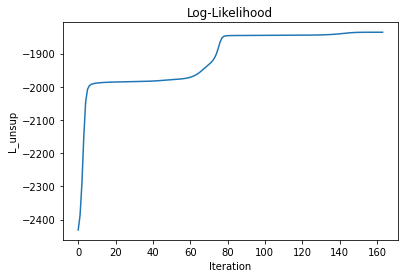

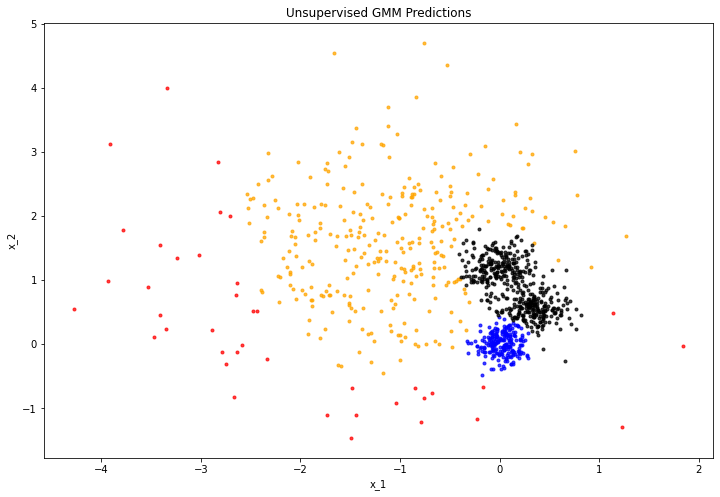

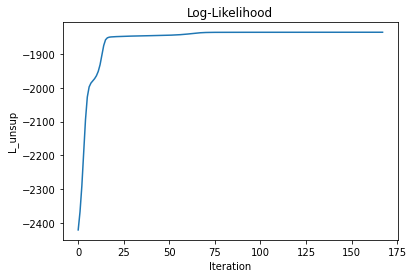

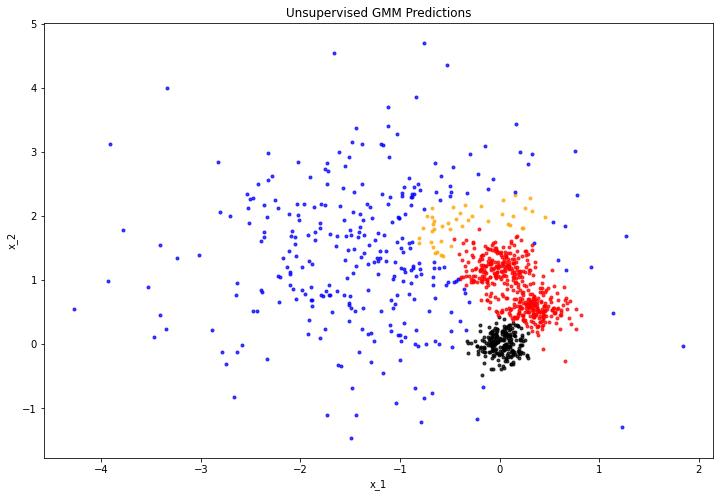

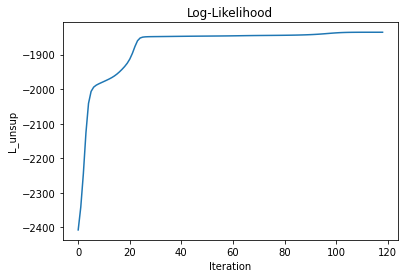

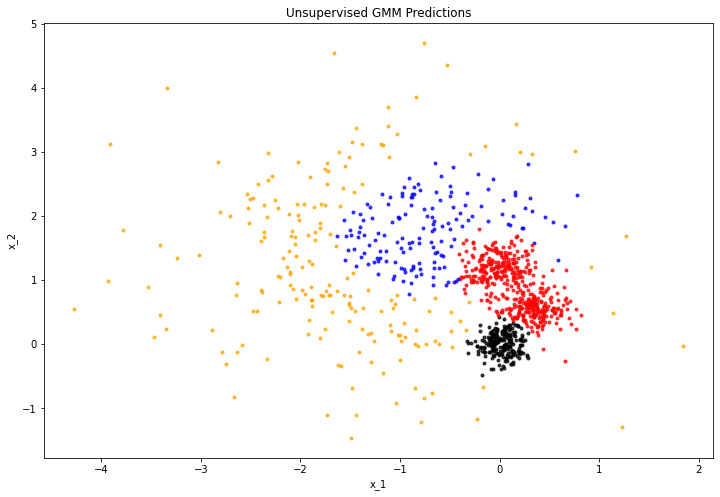

In [21]:
np.random.seed(229)
# Run NUM_TRIALS trials to see how different initializations
# affect the final predictions with and without supervision
for t in range(NUM_TRIALS):
    main(is_semi_supervised=False, trial_num=t)

In [22]:
def run_semi_supervised_em(x, x_tilde, z, w, phi, mu, sigma):
    """Problem 3(e): Semi-Supervised EM Algorithm.

    See inline comments for instructions.

    Args:
        x: Design matrix of unlabeled examples of shape (m, n).
        x_tilde: Design matrix of labeled examples of shape (m_tilde, n).
        z: Array of labels of shape (m_tilde, 1).
        w: Initial weight matrix of shape (m, k).
        phi: Initial mixture prior, of shape (k,).
        mu: Initial cluster means, list of k arrays of shape (n,).
        sigma: Initial cluster covariances, list of k arrays of shape (n, n).

    Returns:
        Updated weight matrix of shape (m, k) resulting from semi-supervised EM algorithm.
        More specifically, w[i, j] should contain the probability of
        example x^(i) belonging to the j-th Gaussian in the mixture.
    """
    # No need to change any of these parameters
    alpha = 20.  # Weight for the labeled examples
    eps = 1e-3   # Convergence threshold
    max_iter = 1000

    # Stop when the absolute change in log-likelihood is < eps
    # See below for explanation of the convergence criterion
    it = 0
    ll = prev_ll = None
    ll_hist =[]
    m,n = x.shape
    k,= phi.shape 
    m_tilde,_ = x_tilde.shape
    
    # initial joint distribution
    # shape (m,k)
    joint_unsup = joint_pdf(x, phi, mu, sigma)
    
    while it < max_iter and (prev_ll is None or np.abs(ll - prev_ll) >= eps):
        pass  # Just a placeholder for the starter code
        # *** START CODE HERE ***
        it+=1
        # (1) E-step: Update your estimates in w
        
        # shape (m,k)
        w = joint_unsup / joint_unsup.sum(axis = 1, keepdims=True)
        
        # (2) M-step: Update the model parameters phi, mu, and sigma
        
        # w_tilde[i,j] = 1{z[i]==j}
        # shape (m_tilde,k)
        w_tilde = z == np.array(range(k))
        
        # scaling factor (denominator for mu and sigma, enumerator for phi)
        # shape (k)
        w_column_sums = np.sum(w,axis = 0)
        # shape (k,)
        w_tilde_column_sums = np.sum(w_tilde, axis=0)
        # shape(k,)
        weighted_sum = w_column_sums + alpha* w_tilde_column_sums
        
        # shape (k,n)
        mu_enumerator = w.T @ x + alpha* w_tilde.T @ x_tilde
        mu = mu_enumerator / weighted_sum.reshape((k,1))
        
        # shape (m,k,n,1)
        x_normed = x.reshape((m,1,n,1)) - mu.reshape((1,k,n,1))
        # shape (m,k,1,n)
        x_normed_T = np.transpose(x_normed, (0,1,3,2))
        
        # shape (m_tilde,k,n,1)
        x_tilde_normed = x_tilde.reshape((m_tilde,1,n,1)) - mu.reshape((1,k,n,1))
        # shape (m_tilde,k,1,n)
        x_tilde_normed_T = np.transpose(x_tilde_normed, (0,1,3,2))
        
        # shape (k,n,n)
        sigma_enum_sup = np.sum(w.reshape((m,k,1,1)) * x_normed @ x_normed_T, axis=0)
        sigma_enum_unsup = np.sum(w_tilde.reshape((m_tilde,k,1,1)) * x_tilde_normed @ x_tilde_normed_T, axis=0)
        sigma_enum = sigma_enum_sup + alpha* sigma_enum_unsup
        sigma = sigma_enum / weighted_sum.reshape((k,1,1))

        
        #  shape (k,)
        phi = weighted_sum/(m+alpha*m_tilde)
        
        # (3) Compute the log-likelihood of the data to check for convergence.
        # Hint: Make sure to include alpha in your calculation of ll.
        # Hint: For debugging, recall part (a). We showed that ll should be monotonically increasing.
        prev_ll = ll
        
        # shape (m,k) , (m_tilde,)
        joint_unsup, joint_sup = joint_pdf(x, phi, mu, sigma, with_supervision=True, x_tilde=x_tilde, z=z)
        
        # sum_z[p(x|z) * p(z)]
        # shape (m,)
        margin= np.sum(joint_unsup, axis=1)        
        ll_unsup = np.sum(np.log(margin))
        
        ll_sup = np.sum(np.log(joint_sup))
        ll = ll_unsup + alpha* ll_sup
        ll_hist.append(ll)
        
        # *** END CODE HERE ***
    
    print("Converged after {} iterations".format(it))
    plt.figure()
    plt.title('Log-Likelihood')
    plt.xlabel('Iteration')
    plt.ylabel('L_semi-sup')
    plt.plot(ll_hist)
    return w

Running semi-supervised EM algorithm...
Converged after 19 iterations
Running semi-supervised EM algorithm...
Converged after 21 iterations
Running semi-supervised EM algorithm...
Converged after 23 iterations


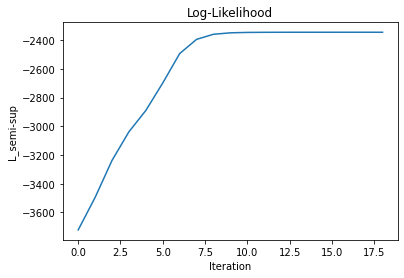

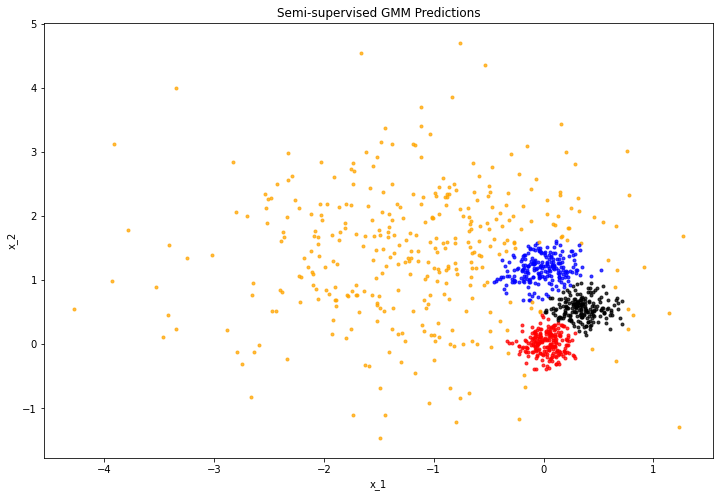

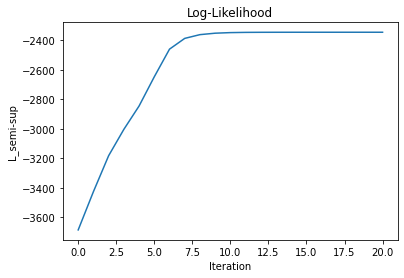

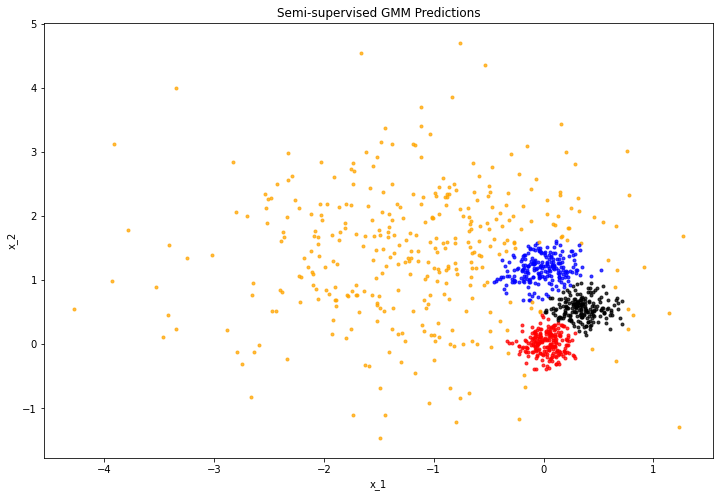

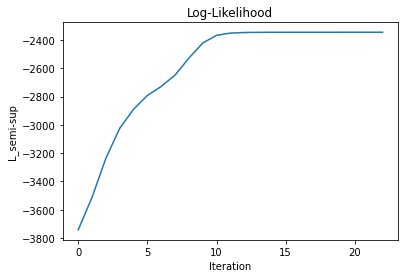

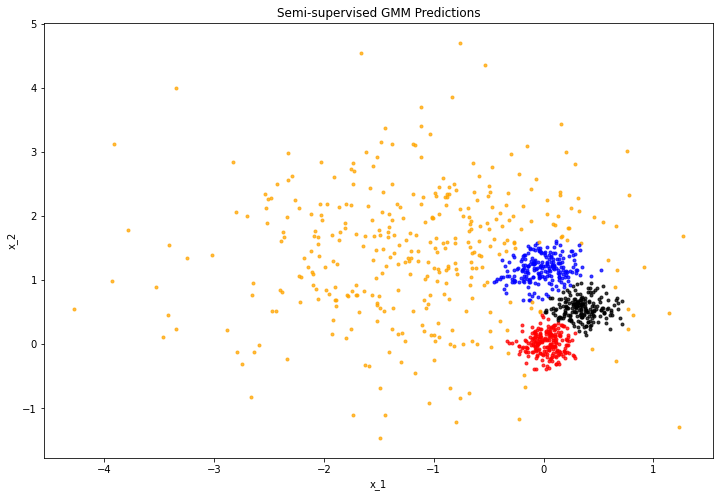

In [23]:
for t in range(NUM_TRIALS):
       # main(is_semi_supervised=False, trial_num=t)

        # *** START CODE HERE ***
        # Once you've implemented the semi-supervised version,
        # uncomment the following line.
        # You do not need to add any other lines in this code block.
     main(is_semi_supervised=True, trial_num=t)
        # *** END CODE HERE ***

### <div style="text-align: left; background-color: #003554; color: white; padding: 10px; line-height: 1">PS3-5 K-means for Compression</div>

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imread

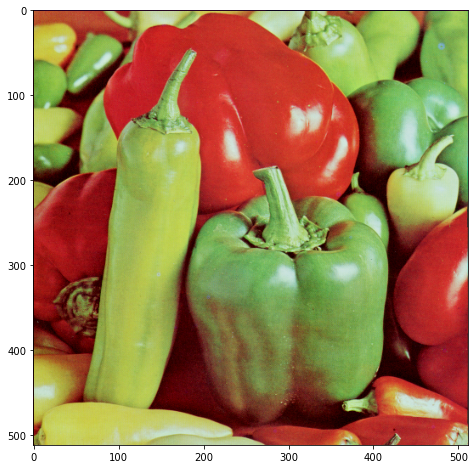

In [25]:
A = imread('peppers-large.tiff')
plt.figure(figsize=(8,8))
plt.imshow(A)

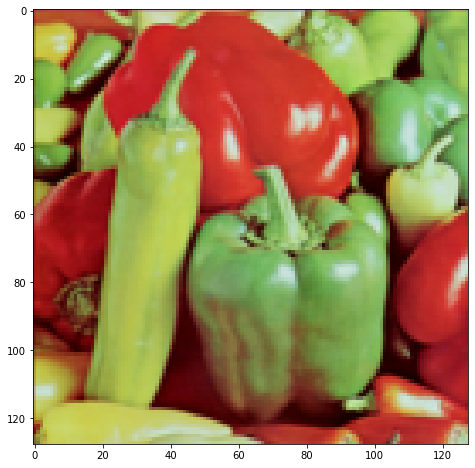

In [27]:
B = imread('peppers-small.tiff')
plt.figure(figsize=(8,8))
plt.imshow(B)

We will now run K-means clustering on the pixels of this image. We run the loop for a minimum of 30 iterations, and use 16 clusters. The algorithm runs as follows:

1. Randomly pick 16 pixels from the image to initialize the centroids

2. Repeat until convergence:

a. Assign each pixel from the image to the neareast centroid

b. For each centroid, calculate the mean of all the pixels assigned to it

c. Update the centroids to the mean calculated in step 2.

In [28]:
def k_means(X, n_centroids=16, min_iter=30):
    C = X.reshape(-1,3)
    # Randomly initialize the centroids
    centroids = C[np.random.randint(0, C.shape[0], n_centroids)]
    error_history = []
    error = 1
    n_iter = 0
    
    # Loop until for at least min_iter and while the centroids are not stable
    while (error > 0 or n_iter < min_iter):
        # For each pixel, calculate the distance to all current centroids:
        norms = np.array([np.linalg.norm(C-centroids[k,:],2,1) for k in range(n_centroids)]).T
        # Assign each pixel to the closest centroid:
        assign = np.argmin(norms,1)
        # For a given centroid, calculate the mean of the pixels assigned to it:
        means = np.array([np.mean(C[np.where(assign == k)],0) for k in range(n_centroids)])
        # Check for stability of the centroids and keep track of the error history
        error = np.linalg.norm(centroids-means,1,1).sum()
        error_history.append(error)
        # Assign the new centroids as the means calculated previously:
        centroids = means
        n_iter += 1
        
    return centroids, error_history

In [29]:
centroids, error_history = k_means(B)

Text(0, 0.5, 'Norm 1 Error')

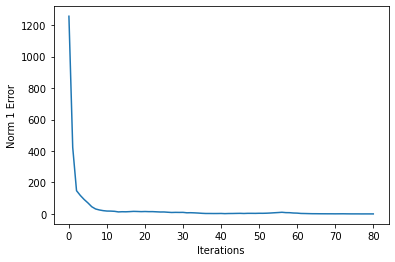

In [30]:
plt.plot(error_history)
plt.xlabel('Iterations')
plt.ylabel('Norm 1 Error')

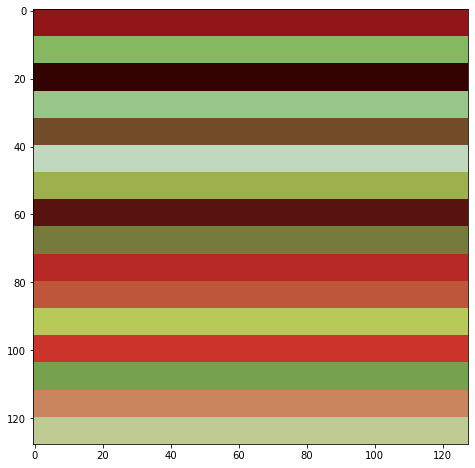

In [31]:
centroids = centroids.astype(int)
colormap = np.repeat(centroids,1024,0).reshape(128,128,3)
plt.figure(figsize=(8,8))
plt.imshow(colormap)

In [32]:
C = A.reshape(-1,3)
# For each pixel, calculate the distance to all current centroids:
norms = np.array([np.linalg.norm(C-centroids[k,:],2,1) for k in range(centroids.shape[0])]).T
# Assign each pixel to the closest centroid:
assign = np.argmin(norms,1)

# Create a new image where each pixel is the the centroid closest to the pixel in the original image
compressed_image = np.array([centroids[assign[k]] for k in range(assign.shape[0])])
compressed_image = compressed_image.reshape(512,512,3)

Text(0.5, 1.0, 'Compressed Image')

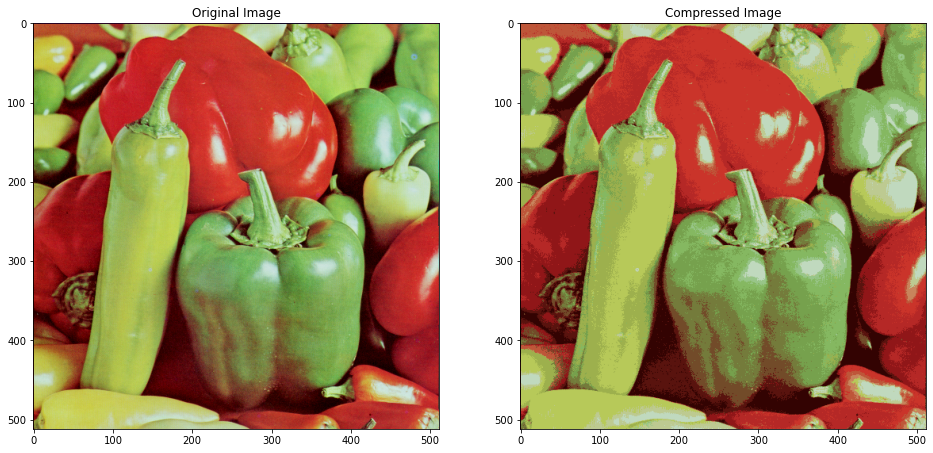

In [33]:
fig, axes = plt.subplots(1, 2, figsize=(16, 8))
ax0, ax1 = axes.ravel()

ax0.imshow(A)
ax0.set_title('Original Image')
ax1.imshow(compressed_image)
ax1.set_title('Compressed Image')